In [ ]:
%%capture
!pip install transformers

In [ ]:
# Importing libraries
from google.colab import files
from google.colab import drive

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/GenAI_project/sampled_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset from the specified file path
df = pd.read_csv(file_path)

# Display the dataframe
df.head()

,question,answer,question_arm,answer_arm
0,What is the largest planet in our solar system?,Jupiter.,Ո՞րն է մեր արեգակնային համակարգի ամենամեծ մոլո...,Յուպիտեր.
1,"Who painted the famous artwork called ""The Las...",Michelangelo.,"Ո՞վ է նկարել հայտնի արվեստի գործը, որը կոչվում...",Միքելանջելո.
2,"Which country is known as the ""Land of the Free""?",The United States of America.,Ո՞ր երկիրն է հայտնի որպես «Ազատների երկիր»:,Ամերիկայի Միացյալ Նահանգներ.
3,what countries does the mississippi river run ...,The Mississippi River runs through the United ...,Ո՞ր երկրների միջով է անցնում Միսիսիպի գետը:,Միսիսիպի գետը հոսում է Միացյալ Նահանգներով։
4,what did edward jenner do for a living?,Edward Jenner was a physician.,ինչո՞վ էր զբաղվում Էդվարդ Ջենները:,Էդվարդ Ջենները բժիշկ էր։


In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("ai-forever/mGPT-1.3B-armenian")
model = GPT2LMHeadModel.from_pretrained("ai-forever/mGPT-1.3B-armenian")

# Set up the device to use GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the appropriate device
model.to(device)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(100000, 2048)
    (wpe): Embedding(2048, 2048)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=2048, out_features=100000, bias=False)
)

# Zero-Shot Setup

In [ ]:
def generate_text(question):
  """
    Generate text responses for a given question using a pre-trained model.

    Args:
        question (str): The question string to generate a response for.

    Returns:
        str: The generated text response.
    """
    input_ids = tokenizer.encode(question, return_tensors="pt").to(device)

    # Generate the response using model settings
    out = model.generate(
        input_ids,
        min_length=50,
        #max_length=100,
        max_new_tokens=100,
        eos_token_id=5,
        pad_token_id=1,
        top_k=10,
        top_p=0.0,
        no_repeat_ngram_size=5
    )
    generated_text = list(map(tokenizer.decode, out))[0]
    return generated_text

In [ ]:
# Adding responses to DataFrame
df['generated_responses_arm_ZS'] = None
for i in range(len(df)):
    question = df.loc[i, 'question_arm']
    df.loc[i, 'generated_responses_arm_ZS'] = generate_text(question)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:497: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:509: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `10` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(


In [ ]:
df.head()

,question,answer,question_arm,human_answers,answer_arm,generated_responses_arm_ZS
0,What is the largest planet in our solar system?,Jupiter.,Ո՞րն է մեր արեգակնային համակարգի ամենամեծ մոլո...,NaN,Յուպիտեր.,Ո՞րն է մեր արեգակնային համակարգի ամենամեծ մոլո...
1,"Who painted the famous artwork called ""The Las...",Michelangelo.,"Ո՞վ է նկարել հայտնի արվեստի գործը, որը կոչվում...",NaN,Միքելանջելո.,"Ո՞վ է նկարել հայտնի արվեստի գործը, որը կոչվում..."
2,"Which country is known as the ""Land of the Free""?",The United States of America.,Ո՞ր երկիրն է հայտնի որպես «Ազատների երկիր»:,"Թաիլանդը հայտնի է «Ազատների երկիր» անունով, քա...",Ամերիկայի Միացյալ Նահանգներ.,Ո՞ր երկիրն է հայտնի որպես «Ազատների երկիր»:\nԱ...
3,what countries does the mississippi river run ...,The Mississippi River runs through the United ...,Ո՞ր երկրների միջով է անցնում Միսիսիպի գետը:,Միսիսիպի գետը և նրա վտակները անցնում են ԱՄՆ-ի ...,Միսիսիպի գետը հոսում է Միացյալ Նահանգներով։,Ո՞ր երկրների միջով է անցնում Միսիսիպի գետը:\nՄ...
4,what did edward jenner do for a living?,Edward Jenner was a physician.,ինչո՞վ էր զբաղվում Էդվարդ Ջենները:,1772 թվականին 23 տարեկան հասակում Էդվարդ Ջեննե...,Էդվարդ Ջենները բժիշկ էր։,ինչո՞վ էր զբաղվում Էդվարդ Ջենները:\n- Ինձ համա...


In [ ]:
# Save the DataFrame to a CSV file
csv_filename = 'generated_responses.csv'
df.to_csv(csv_filename, index=False)
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Few-Shot Setup

In [ ]:
def generate_text_with_examples(question, examples):
  """
    Generate a text response for a given question using provided examples.

    Args:
        question (str): The question to generate a response for.
        examples (str): Contextual examples to guide the response generation.

    Returns:
        str: The generated text response.
    """
    # Create a prompt incorporating examples and the question
    prompt = f"{examples}\nQuestion: {question}\nAnswer:"
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

    # Generate the response using model settings
    out = model.generate(
        input_ids,
        min_length=50,
        max_new_tokens=100,
        eos_token_id=5,
        pad_token_id=1,
        top_k=10,
        top_p=0.0,
        no_repeat_ngram_size=5
    )
    generated_text = list(map(tokenizer.decode, out))[0]
    return generated_text

In [ ]:
# Examples for few-shot learning
examples = (
    "Question: Ո՞րն է Կանադայի մայրաքաղաքը:?\nAnswer: Կանադայի մայրաքաղաքը Օտտավան է:\n"
    "Question: Ո՞վ է 1984 վեպի հեղինակը։?\nAnswer: 1984 վեպի հեղինակը Ջորջ Օրուելն է։\n"
    "Question: Ո՞վ է Հայաստանի նախագահը:\nAnswer: Հայաստանի նախագահն է Արմեն Սարգսյանը.\n"
    "Question: Քանի՞ կողմ ունի հնգանկյունը:\nAnswer: Հնգանկյունը ունի հինգ կողմ և հինգ անկյուն։\n"
)

In [ ]:
# Generate responses and add them to DataFrame
df['generated_responses_arm_FS'] = None
for i in range(len(df)):
    question = df.loc[i, 'question_arm']
    df.loc[i, 'generated_responses_arm_FS'] = generate_text_with_examples(question, examples)


In [ ]:
# Save the DataFrame to a CSV file
csv_filename = 'generated_responses.csv'
df.to_csv(csv_filename, index=False)
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Calculating similarity between generated responses and reference answers

In [ ]:
%%capture
!pip install sentence-transformers

In [ ]:
from transformers import BertModel, BertTokenizer
import torch
from sklearn.metrics.pairwise import cosine_similarity

#mBERT score for zero-shot responses

In [ ]:
# Load the mBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
model = BertModel.from_pretrained('bert-base-multilingual-uncased')

# Function to get sentence embeddings
def get_sentence_embeddings(sentences):
  """
  Generate sentence embeddings for a list of sentences using the mBERT model.

  Args:
      sentences (list of str): Sentences to encode.

  Returns:
      torch.Tensor: The embeddings for the input sentences, averaged across tokens.
    """

    # Prepare the tokenizer inputs with appropriate padding, truncation, and max length
    inputs = tokenizer(sentences, return_tensors='pt', truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    # Mean pooling
    embeddings = torch.mean(outputs.last_hidden_state, dim=1)
    return embeddings

# Encode the sentences
embeddings1 = get_sentence_embeddings(df['answer_arm'].tolist())
embeddings2 = get_sentence_embeddings(df['generated_responses_arm_ZS'].tolist())

# Compute cosine similarity
cosine_scores = cosine_similarity(embeddings1.numpy(), embeddings2.numpy())

# Add the cosine similarity scores to the DataFrame
df['mBERT_Similarity_ZS'] = [cosine_scores[i][i] for i in range(len(df))]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [ ]:
# Summary Statistics
summary_statistics = df['mBERT_Similarity_ZS'].describe()
print(f'Summary Statistics:\n{summary_statistics}')

Summary Statistics:
count    50.000000
mean      0.707658
std       0.122567
min       0.373464
25%       0.617628
50%       0.724332
75%       0.799885
max       0.906355
Name: mBERT_Similarity_ZS, dtype: float64


#mBERT score for few-shot responses

In [ ]:
# Encode the sentences
embeddings1 = get_sentence_embeddings(df['answer_arm'].tolist())
embeddings2 = get_sentence_embeddings(df['generated_responses_arm_FS'].tolist())

# Compute cosine similarity
cosine_scores = cosine_similarity(embeddings1.numpy(), embeddings2.numpy())

# Add the cosine similarity scores to the DataFrame
df['mBERT_Similarity_FS'] = [cosine_scores[i][i] for i in range(len(df))]

In [ ]:
# Summary Statistics
summary_statistics = df['mBERT_Similarity_FS'].describe()
print(f'Summary Statistics:\n{summary_statistics}')

Summary Statistics:
count    50.000000
mean      0.626093
std       0.118539
min       0.347830
25%       0.541649
50%       0.648455
75%       0.713014
max       0.846593
Name: mBERT_Similarity_FS, dtype: float64


# The distribution of mBERT scores for two different setups

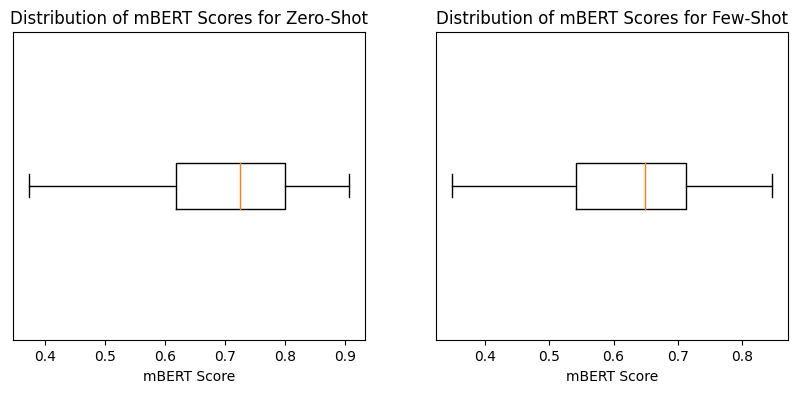

In [ ]:
plt.figure(figsize=(10, 4))

# Create a subplot for the Zero-Shot distribution
plt.subplot(1, 2, 1)
plt.boxplot(df['mBERT_Similarity_ZS'], vert=False)
plt.title('Distribution of mBERT Scores for Zero-Shot')
plt.xlabel('mBERT Score')
plt.yticks([])

# Create a subplot for the Few-Shot distribution
plt.subplot(1, 2, 2)
plt.boxplot(df['mBERT_Similarity_FS'], vert=False)
plt.title('Distribution of mBERT Scores for Few-Shot')
plt.xlabel('mBERT Score')
plt.yticks([])

plt.show()

In [ ]:
# Save the DataFrame to a CSV file
csv_filename = 'generated_responses.csv'
df.to_csv(csv_filename, index=False)
files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>